**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [4]:
# Import the data set
data=pd.read_csv(r'C:\Users\yash\Desktop\Machine Learning\Internship\cleaned_data.csv')

In [5]:
# Define the sigmoid function
def sigmoid(x):
    z = 1/(1 + np.exp(-x)) 
    return z

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
# Create a train/test split
X=data[['PAY_1','LIMIT_BAL']]
y=data['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [10]:
lr = LogisticRegression(solver='liblinear')


LogisticRegression(solver='liblinear')

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [93]:
# Fit the logistic regression model on training data
lr.fit(X_train, y_train)
print(X_test.shape)

(5333, 2)


In [80]:
# Make predictions using `.predict()`
y_pred=lr.predict(X_test)

In [13]:
# Find class probabilities using `.predict_proba()`
lr.predict_proba(X_test)

array([[0.9285461 , 0.0714539 ],
       [0.89013758, 0.10986242],
       [0.58356929, 0.41643071],
       ...,
       [0.77114629, 0.22885371],
       [0.79409241, 0.20590759],
       [0.91905606, 0.08094394]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [40]:
# Add column of 1s to features
a=np.ones(len(X))
X['ones']=a
columns_titles = ["ones","PAY_1","LIMIT_BAL"]
X=X.reindex(columns=columns_titles)
print(X.head())

(26664, 3)


In [37]:
# Get coefficients and intercepts from trained model
print(lr.coef_)
print(lr.intercept_)

coef=np.array(lr.coef_)
d=np.append(coef,[1])
d[ 0], d[ 2] = d[ 2], d[0].copy()
d[ 1], d[ 2] = d[ 2], d[1].copy()
inter=np.array(lr.intercept_)
print(d)

[[ 8.13578368e-11 -6.74886182e-06]]
[-6.45081561e-11]
[ 1.00000000e+00  8.13578368e-11 -6.74886182e-06]


In [69]:
# Manually calculate predicted probabilities
h=np.dot(-X,d)
val=sigmoid(h+inter)
print(val)

[0.29629102 0.45260854 0.40309097 ... 0.31055324 0.38696422 0.34016547]


______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [83]:
# Manually calculate predicted classes
ab=[]
for i in val:
    if(i>0.5):
        ab.append(1)
    else:
        ab.append(0)
    

In [88]:
# Compare to scikit-learn's predicted classes


26664


______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

E:\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
E:\anaconda\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


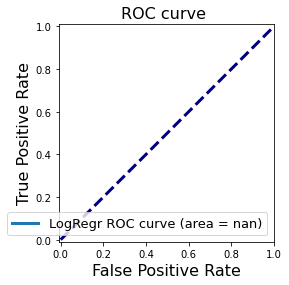

In [85]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
from sklearn.metrics import roc_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_pred, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve ', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


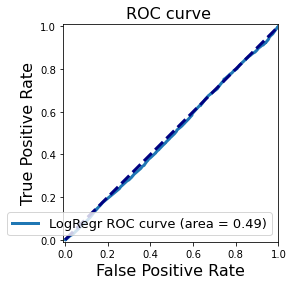

In [94]:
# Use manually calculated predicted probabilities to calculate ROC AUC
y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(ab[:5333], y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve ', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()